In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import colorsys
import random
import os
from PIL import Image, ImageOps
from keras.utils import to_categorical

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[1], 'GPU')

In [2]:
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Dense, Activation, Add, LeakyReLU
from keras.layers import Lambda, Conv2DTranspose, UpSampling2D, Reshape
from keras.models import Model
from keras.optimizers import Adam

2024-03-01 12:40:29.795977: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-01 12:40:30.005676: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-01 12:40:31.036977: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:

inp_sh=(212,256,1)
inp0=Input(shape=(212,256,1))
inp1=Input(shape=(212,256,1))

x0=Conv2D(16,(3,3), padding='SAME')(inp0)
x0=BatchNormalization()(x0)
x0=Activation('relu')(x0)
x00=MaxPooling2D((2,2))(x0)

x0=Conv2D(32,(3,3), padding='SAME')(x00)
x0=BatchNormalization()(x0)
x0=Activation('relu')(x0)
x01=MaxPooling2D((2,2))(x0)

x0=Conv2D(64,(3,3), padding='SAME')(x01)
x0=BatchNormalization()(x0)
x0=Activation('relu')(x0)
x02=MaxPooling2D((2,2))(x0)

x0=Conv2D(128,(3,3), padding='SAME')(x02)
x0=BatchNormalization()(x0)
x0=Activation('relu')(x0)
x03=MaxPooling2D((2,2))(x0)


x1=Conv2D(16,(3,3), padding='SAME')(inp1)
x1=BatchNormalization()(x1)
x1=Activation('relu')(x1)
x10=MaxPooling2D((2,2))(x1)

x1=Conv2D(32,(3,3), padding='SAME')(x10)
x1=BatchNormalization()(x1)
x1=Activation('relu')(x1)
x11=MaxPooling2D((2,2))(x1)

x1=Conv2D(64,(3,3), padding='SAME')(x11)
x1=BatchNormalization()(x1)
x1=Activation('relu')(x1)
x12=MaxPooling2D((2,2))(x1)

x1=Conv2D(128,(3,3), padding='SAME')(x12)
x1=BatchNormalization()(x1)
x1=Activation('relu')(x1)
x13=MaxPooling2D((2,2))(x1)

#y1=Add()([x01,x11])
#y2=Add()([x02,x12])
x=Add()([x03,x13])




x2=UpSampling2D((2,2))(x)
x2=Conv2DTranspose(64,(3,3), padding='SAME')(x2)
x2=BatchNormalization()(x2)
x2=Activation('relu')(x2)

x2=UpSampling2D((2,2))(x2)
x2=Conv2DTranspose(32,(3,3), padding='SAME')(x2)
#x2=Conv2DTranspose(32,(3,1))(x2)
x2=BatchNormalization()(x2)
x2=Activation('relu')(x2)

x2=UpSampling2D((2,2))(x2)
x2=Conv2DTranspose(16,(3,3), padding='SAME')(x2)
x2=Conv2DTranspose(8,(3,1))(x2)
x2=BatchNormalization()(x2)
x2=Activation('relu')(x2)

x2=UpSampling2D((2,2))(x2)
x2=Conv2DTranspose(1,(3,3), padding='SAME')(x2)
#x2=BatchNormalization()(x2)
x2=Activation('sigmoid')(x2)




x3=UpSampling2D((2,2))(x)
x3=Conv2DTranspose(64,(3,3), padding='SAME')(x3)
x3=BatchNormalization()(x3)
x3=Activation('relu')(x3)

x3=UpSampling2D((2,2))(x3)
x3=Conv2DTranspose(32,(3,3), padding='SAME')(x3)
#x3=Conv2DTranspose(32,(3,1))(x3)
x3=BatchNormalization()(x3)
x3=Activation('relu')(x3)

x3=UpSampling2D((2,2))(x3)
x3=Conv2DTranspose(16,(3,3), padding='SAME')(x3)
x3=Conv2DTranspose(8,(3,1))(x3)
x3=BatchNormalization()(x3)
x3=Activation('relu')(x3)

x3=UpSampling2D((2,2))(x3)
x3=Conv2DTranspose(1,(3,3), padding='SAME')(x3)
#x3=Conv2DTranspose(3,(3,3), padding='SAME')(x3)
#x3=BatchNormalization()(x3)
x3=Activation('sigmoid')(x3)



gen_model=Model(inputs=[inp0, inp1], outputs=[x2, x3])
gen_model.compile(loss=['mse','mse'], optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False))


2024-03-01 12:40:34.046680: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46140 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:86:00.0, compute capability: 8.6
2024-03-01 12:40:34.047314: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 46681 MB memory:  -> device: 1, name: NVIDIA RTX A6000, pci bus id: 0000:af:00.0, compute capability: 8.6


In [4]:
gen_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 212, 256, 16)         160       ['input_1[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 212, 256, 16)         160       ['input_2[0][0]']             
                                                                                              

In [5]:
inp0=Input(shape=(212,256,1))
inp1=Input(shape=(212,256,1))

def create_dscriminator():
    inp0=Input(shape=(212,256,1))
    x1=Conv2D(16,(3,3))(inp0)
    x1=LeakyReLU()(x1)
    x1=Conv2D(16,(3,3),strides=(2,2))(x1)
    x1=BatchNormalization()(x1)
    x1=LeakyReLU()(x1)
    x1=Conv2D(16,(3,3))(x1)
    x1=BatchNormalization()(x1)
    x1=LeakyReLU()(x1)
    x1=Conv2D(16,(3,3),strides=(2,2))(x1)
    x1=BatchNormalization()(x1)
    x1=LeakyReLU()(x1)
    x1=Conv2D(16,(3,3))(x1)
    x1=BatchNormalization()(x1)
    x1=LeakyReLU()(x1)
    x1=Conv2D(16,(3,3),strides=(2,2))(x1)
    x1=BatchNormalization()(x1)
    x1=LeakyReLU()(x1)
    x1=GlobalAveragePooling2D()(x1)
    x1=Dense(1,activation='sigmoid')(x1)

    model=Model(inputs=inp0, outputs=x1)
    model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
    return model

disc1= create_dscriminator()
disc2= create_dscriminator()

In [6]:
disc1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 212, 256, 1)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 210, 254, 16)      160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 210, 254, 16)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 104, 126, 16)      2320      
                                                                 
 batch_normalization_14 (Ba  (None, 104, 126, 16)      64        
 tchNormalization)                                               
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 104, 126, 16)      0         
                                                           

In [57]:
gen_model.outputs

[<KerasTensor: shape=(None, 212, 256, 1) dtype=float32 (created by layer 'activation_27')>,
 <KerasTensor: shape=(None, 212, 256, 1) dtype=float32 (created by layer 'activation_31')>]

In [7]:
[x1, x2]=gen_model([inp0,inp1])
d1=disc1(x1)
d2=disc2(x2)
#c=class_model([f1,f2,f3])
model=Model(inputs=[inp0, inp1], outputs=[x1,x2,d1,d2])
model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
              optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),
              metrics=['accuracy'])

In [8]:
import glob
MRIAD=sorted(glob.glob('/home/user/Chandrajit/Information_fusion/MRIDATA/AD/*'))
PETAD=sorted(glob.glob('/home/user/Chandrajit/Information_fusion/PET DATA/AD/*'))
MRICN=sorted(glob.glob('/home/user/Chandrajit/Information_fusion/MRIDATA/CN/*'))
PETCN=sorted(glob.glob('/home/user/Chandrajit/Information_fusion/PET DATA/CN/*'))
MRIMCI=sorted(glob.glob('/home/user/Chandrajit/Information_fusion/MRIDATA/MCI/*'))
PETMCI=sorted(glob.glob('/home/user/Chandrajit/Information_fusion/PET DATA/MCI/*'))
MRISMC=sorted(glob.glob('/home/user/Chandrajit/Information_fusion/MRIDATA/SMC/*'))
PETSMC=sorted(glob.glob('/home/user/Chandrajit/Information_fusion/PET DATA/SMC/*'))

In [9]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 model (Functional)          [(None, 212, 256, 1),        391746    ['input_3[0][0]',             
                              (None, 212, 256, 1)]                   'input_4[0][0]']             
                                                                                                  
 model_1 (Functional)        (None, 1)                    12097     ['model[0][0]']         

In [61]:
from PIL import Image, ImageOps
from keras.utils import to_categorical

b1=100
ad11=np.zeros((b1,212,256))
ad21=np.zeros((b1,212,256))
cn11=np.zeros((b1,212,256))
cn21=np.zeros((b1,212,256))
mc11=np.zeros((b1,212,256))
mc21=np.zeros((b1,212,256))
smc11=np.zeros((b1,212,256))
smc21=np.zeros((b1,212,256))

Ydisc=np.concatenate((np.ones(4*b1),np.zeros(4*b1)),axis=0)
Yclass=np.concatenate((np.zeros((b1,1)),np.ones((b1,1)),np.ones((b1,1))*2,np.ones((b1,1))*3),axis=0)
Ydisc1=np.ones((4*b1,1))

model.layers[2].trainable=True
model.layers[3].trainable=False
model.layers[4].trainable=False
model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
              optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
model.load_weights('/home/user/Chandrajit/Information_fusion/4classes/GAN_weights/weight_60.h5')

for iter in range(61,80):
    print("epoch no:"+str(iter))
    model.layers[2].trainable=False
    model.layers[3].trainable=True
    model.layers[4].trainable=True
    model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
              optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])

    for d_iter in range(0,3):
            
        for i in range(0,800,b1):
            
            for j in range(0,b1):
                ad11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIAD[i+j]).resize((256,212))))
                ad21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETAD[i+j]).resize((256,212))))
                cn11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRICN[i+j]).resize((256,212))))
                cn21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETCN[i+j]).resize((256,212))))
                mc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIMCI[i+j]).resize((256,212))))
                mc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETMCI[i+j]).resize((256,212))))
                smc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRISMC[i+j]).resize((256,212))))
                smc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETSMC[i+j]).resize((256,212))))

            ad1=np.expand_dims(ad11,axis=-1)
            ad2=np.expand_dims(ad21,axis=-1)
            cn1=np.expand_dims(cn11,axis=-1)
            cn2=np.expand_dims(cn21,axis=-1)
            mc1=np.expand_dims(mc11,axis=-1)
            mc2=np.expand_dims(mc21,axis=-1)
            smc1=np.expand_dims(smc11,axis=-1)
            smc2=np.expand_dims(smc21,axis=-1)
            
            X1=np.concatenate((ad1,cn1,mc1,smc1),axis=0)/255.0
            X2=np.concatenate((ad2,cn2,mc2,smc2),axis=0)/255.0
            Xgen=model.layers[2].predict([X1,X2])
            model.layers[3].fit(np.concatenate((X1,Xgen[0]),axis=0),Ydisc,shuffle=True)
            model.layers[4].fit(np.concatenate((X2,Xgen[1]),axis=0),Ydisc,shuffle=True)

    
    model.layers[2].trainable=True
    model.layers[3].trainable=False
    model.layers[4].trainable=False
    model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
              optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
    
    for gen_iter in range(0,5):
        for i in range(0,800,b1):
            
            for j in range(0,b1):
                ad11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIAD[i+j]).resize((256,212))))
                ad21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETAD[i+j]).resize((256,212))))
                cn11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRICN[i+j]).resize((256,212))))
                cn21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETCN[i+j]).resize((256,212))))
                mc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIMCI[i+j]).resize((256,212))))
                mc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETMCI[i+j]).resize((256,212))))
                smc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRISMC[i+j]).resize((256,212))))
                smc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETSMC[i+j]).resize((256,212))))

            ad1=np.expand_dims(ad11,axis=-1)
            ad2=np.expand_dims(ad21,axis=-1)
            cn1=np.expand_dims(cn11,axis=-1)
            cn2=np.expand_dims(cn21,axis=-1)
            mc1=np.expand_dims(mc11,axis=-1)
            mc2=np.expand_dims(mc21,axis=-1)
            smc1=np.expand_dims(smc11,axis=-1)
            smc2=np.expand_dims(smc21,axis=-1)
            
            X1=np.concatenate((ad1,cn1,mc1,smc1),axis=0)/255.0
            X2=np.concatenate((ad2,cn2,mc2,smc2),axis=0)/255.0
            model.fit([X1,X2],[X1,X2,Ydisc1,Ydisc1],batch_size=16,shuffle=True)

    model.save_weights('/home/user/Chandrajit/Information_fusion/4classes/GAN_weights/weight_'+str(iter)+'.h5')
   

epoch no:61
25/25 [==============================] - 4s 14ms/step - loss: 0.9154 - accuracy: 0.6925


KeyboardInterrupt: 

In [14]:
from keras.layers import Flatten
model.layers[2].trainable=True
model.layers[3].trainable=False
model.layers[4].trainable=False
model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
             optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
model.load_weights('/home/user/Chandrajit/Information_fusion/4classes/GAN_weights/weight_50.h5')
m0=Model(inputs=model.layers[2].input, outputs=Flatten()(model.layers[2].layers[34].output))
m0.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 212, 256, 16)         160       ['input_1[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 212, 256, 16)         160       ['input_2[0][0]']             
                                                                                            

In [18]:
from PIL import Image, ImageOps
from keras.utils import to_categorical
import scipy.io as scio
import numpy as np

b1=200
ad11=np.zeros((b1,212,256))
ad21=np.zeros((b1,212,256))
cn11=np.zeros((b1,212,256))
cn21=np.zeros((b1,212,256))
mc11=np.zeros((b1,212,256))
mc21=np.zeros((b1,212,256))
smc11=np.zeros((b1,212,256))
smc21=np.zeros((b1,212,256))

Yclass=np.concatenate((np.zeros((b1,1)),np.ones((b1,1)),np.ones((b1,1))*2,np.ones((b1,1))*3),axis=0)

count=0
for i in range(0,1000,b1):
    for j in range(0,b1):
        ad11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIAD[i+j]).resize((256,212))))
        ad21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETAD[i+j]).resize((256,212))))
        cn11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRICN[i+j]).resize((256,212))))
        cn21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETCN[i+j]).resize((256,212))))
        mc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIMCI[i+j]).resize((256,212))))
        mc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETMCI[i+j]).resize((256,212))))
        smc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRISMC[i+j]).resize((256,212))))
        smc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETSMC[i+j]).resize((256,212))))

    ad1=np.expand_dims(ad11,axis=-1)
    ad2=np.expand_dims(ad21,axis=-1)
    cn1=np.expand_dims(cn11,axis=-1)
    cn2=np.expand_dims(cn21,axis=-1)
    mc1=np.expand_dims(mc11,axis=-1)
    mc2=np.expand_dims(mc21,axis=-1)
    smc1=np.expand_dims(smc11,axis=-1)
    smc2=np.expand_dims(smc21,axis=-1)
            
    X1=np.concatenate((ad1,cn1,mc1,smc1),axis=0)/255.0
    X2=np.concatenate((ad2,cn2,mc2,smc2),axis=0)/255.0
    X=m0.predict([X1,X2])
    
    scio.savemat(f'feature_map{count}.mat',{'X':X, 'Y':Yclass})
    count=count+1
    print(count)

2024-03-01 12:52:33.517185: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905


25/25 [==============================] - 4s 7ms/step
1
25/25 [==============================] - 0s 7ms/step
2
25/25 [==============================] - 0s 7ms/step
3
25/25 [==============================] - 0s 7ms/step
4
25/25 [==============================] - 0s 7ms/step
5


In [62]:
from keras.layers import Flatten
model.layers[2].trainable=True
model.layers[3].trainable=False
model.layers[4].trainable=False
model.compile(loss=['mse','mse','binary_crossentropy','binary_crossentropy'], 
             optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
model.load_weights('/home/user/Chandrajit/Information_fusion/4classes/GAN_weights/weight_50.h5')
m0=Model(inputs=model.layers[2].input, outputs=model.layers[2].layers[34].output)
m0.trainable=False

x=m0([inp0,inp1])
x=Conv2D(128,(3,3),padding='SAME', activation='relu')(x)
x=Conv2D(256,(3,3),padding='SAME', activation='relu')(x)
x=Conv2D(512,(3,3),padding='SAME', activation='relu')(x)
x=GlobalAveragePooling2D()(x)
#x=Dense(1024, activation='relu')(x)
x=Dense(512, activation='relu')(x)
#x=Dense(256, activation='relu')(x)
x=Dense(4, activation='softmax')(x)
m1=Model(inputs=[inp0, inp1], outputs=x)
m1.compile(loss='categorical_crossentropy',
           optimizer=Adam(learning_rate = 0.0001, beta_1= 0.9, beta_2 = 0.999, epsilon= 1e-7, amsgrad = False),metrics=['accuracy'])
m1.summary()

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 model_17 (Functional)       (None, 13, 16, 128)          196224    ['input_9[0][0]',             
                                                                     'input_10[0][0]']            
                                                                                                  
 conv2d_52 (Conv2D)          (None, 13, 16, 128)          147584    ['model_17[0][0]']     

In [63]:


b1=300
ad11=np.zeros((b1,212,256))
ad21=np.zeros((b1,212,256))
cn11=np.zeros((b1,212,256))
cn21=np.zeros((b1,212,256))
mc11=np.zeros((b1,212,256))
mc21=np.zeros((b1,212,256))
smc11=np.zeros((b1,212,256))
smc21=np.zeros((b1,212,256))

Yclass=np.concatenate((np.zeros((b1,1)),np.ones((b1,1)),np.ones((b1,1))*2,np.ones((b1,1))*3),axis=0)


for iter in range(0,40):
    print("epoch no:"+str(iter))
    for i in range(0,800,b1):
        for j in range(0,b1):
                ad11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIAD[i+j]).resize((256,212))))
                ad21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETAD[i+j]).resize((256,212))))
                cn11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRICN[i+j]).resize((256,212))))
                cn21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETCN[i+j]).resize((256,212))))
                mc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIMCI[i+j]).resize((256,212))))
                mc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETMCI[i+j]).resize((256,212))))
                smc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRISMC[i+j]).resize((256,212))))
                smc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETSMC[i+j]).resize((256,212))))

        ad1=np.expand_dims(ad11,axis=-1)
        ad2=np.expand_dims(ad21,axis=-1)
        cn1=np.expand_dims(cn11,axis=-1)
        cn2=np.expand_dims(cn21,axis=-1)
        mc1=np.expand_dims(mc11,axis=-1)
        mc2=np.expand_dims(mc21,axis=-1)
        smc1=np.expand_dims(smc11,axis=-1)
        smc2=np.expand_dims(smc21,axis=-1)
            
        X1=np.concatenate((ad1,cn1,mc1,smc1),axis=0)/255.0
        X2=np.concatenate((ad2,cn2,mc2,smc2),axis=0)/255.0
        m1.fit([X1,X2], to_categorical(Yclass), shuffle=True, batch_size=16)
        #model.layers[4].fit(np.concatenate((X2,Xgen[1]),axis=0),Ydisc,shuffle=True)
    m1.save_weights('/home/user/Chandrajit/Information_fusion/4classes/GAN_weights/class59/weight_'+str(iter)+'.h5')

epoch no:0
75/75 [==============================] - 1s 10ms/step - loss: 0.8141 - accuracy: 0.5575
epoch no:1
75/75 [==============================] - 1s 10ms/step - loss: 0.7480 - accuracy: 0.6167
epoch no:2
75/75 [==============================] - 1s 9ms/step - loss: 0.6419 - accuracy: 0.6850
epoch no:3
75/75 [==============================] - 1s 10ms/step - loss: 0.5059 - accuracy: 0.7842
epoch no:4
75/75 [==============================] - 1s 11ms/step - loss: 0.4342 - accuracy: 0.8108
epoch no:5
75/75 [==============================] - 1s 10ms/step - loss: 0.3243 - accuracy: 0.8775
epoch no:6
75/75 [==============================] - 1s 10ms/step - loss: 0.2930 - accuracy: 0.8917
epoch no:7
75/75 [==============================] - 1s 10ms/step - loss: 0.2256 - accuracy: 0.9225
epoch no:8
75/75 [==============================] - 1s 11ms/step - loss: 0.1875 - accuracy: 0.9308
epoch no:9
75/75 [==============================] - 1s 11ms/step - loss: 0.1369 - accuracy: 0.9575
epoch no:10

In [64]:
b1=100
Ypred=np.zeros(4*200)
Ydes=np.zeros(4*200)
Y1=np.zeros(b1)
Y2=np.ones(b1)
Y3=np.ones(b1)*2
Y4=np.ones(b1)*3

Y0=np.concatenate((Y1,Y2,Y3,Y4),axis=0)

count=0
ad11=np.zeros((b1,212,256))
ad21=np.zeros((b1,212,256))
cn11=np.zeros((b1,212,256))
cn21=np.zeros((b1,212,256))
mc11=np.zeros((b1,212,256))
mc21=np.zeros((b1,212,256))
smc11=np.zeros((b1,212,256))
smc21=np.zeros((b1,212,256))

ad1 = np.zeros((b1,212,256,1))
ad2= np.zeros((b1,212,256,1))
cn1= np.zeros((b1,212,256,1))
cn2= np.zeros((b1,212,256,1))
mc1= np.zeros((b1,212,256,1))
mc2 = np.zeros((b1,212,256,1))
smc1= np.zeros((b1,212,256,1))
smc2 = np.zeros((b1,212,256,1))

for iter in range(0, 40):
    m1.load_weights('/home/user/Chandrajit/Information_fusion/4classes/GAN_weights/class59/weight_'+str(iter)+'.h5')
    print('epoch: '+str(iter))
    count=0
    for i in range(800,1000,b1):
            for j in range(0,b1):
                    ad11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIAD[i+j]).resize((256,212))))
                    ad21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETAD[i+j]).resize((256,212))))
                    cn11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRICN[i+j]).resize((256,212))))
                    cn21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETCN[i+j]).resize((256,212))))
                    mc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIMCI[i+j]).resize((256,212))))
                    mc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETMCI[i+j]).resize((256,212))))
                    smc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRISMC[i+j]).resize((256,212))))
                    smc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETSMC[i+j]).resize((256,212))))

    
            ad1=np.expand_dims(ad11,axis=-1)
            ad2=np.expand_dims(ad21,axis=-1)
            cn1=np.expand_dims(cn11,axis=-1)
            cn2=np.expand_dims(cn21,axis=-1)
            mc1=np.expand_dims(mc11,axis=-1)
            mc2=np.expand_dims(mc21,axis=-1)
            smc1=np.expand_dims(smc11,axis=-1)
            smc2=np.expand_dims(smc21,axis=-1)
                
            X1=np.concatenate((ad1,cn1,mc1,smc1),axis=0)/255.0
            X2=np.concatenate((ad2,cn2,mc2,smc2),axis=0)/255.0
            Y=m1.predict([X1,X2])
            Ydes[count:count+4*b1]=Y0
            Ypred[count:count+4*b1]=np.argmax(Y,axis=1)
            count=count+4*b1
    
    print(sum(Ydes==Ypred)/len(Ydes))

epoch: 0
13/13 [==============================] - 0s 9ms/step
0.60125
epoch: 1
13/13 [==============================] - 0s 8ms/step
0.535
epoch: 2
13/13 [==============================] - 0s 9ms/step
0.72125
epoch: 3
13/13 [==============================] - 0s 9ms/step
0.67375
epoch: 4
13/13 [==============================] - 0s 8ms/step
0.8975
epoch: 5
13/13 [==============================] - 0s 8ms/step
0.90125
epoch: 6
13/13 [==============================] - 0s 8ms/step
0.7975
epoch: 7
13/13 [==============================] - 0s 8ms/step
0.86125
epoch: 8
13/13 [==============================] - 0s 8ms/step
0.915
epoch: 9
13/13 [==============================] - 0s 9ms/step
0.9375
epoch: 10
13/13 [==============================] - 0s 8ms/step
0.9225
epoch: 11
13/13 [==============================] - 0s 8ms/step
0.945
epoch: 12
13/13 [==============================] - 0s 9ms/step
0.9
epoch: 13
13/13 [==============================] - 0s 9ms/step
0.9325
epoch: 14
13/13 [==============

In [48]:
count

800

In [76]:
from PIL import Image, ImageOps
from keras.utils import to_categorical
import time

b1=100
Ypred=np.zeros(4*200)
Ydes=np.zeros(4*200)
Y1=np.zeros(b1)
Y2=np.ones(b1)
Y3=np.ones(b1)*2
Y4=np.ones(b1)*3

Y0=np.concatenate((Y1,Y2,Y3,Y4),axis=0)

count=0
ad11=np.zeros((b1,212,256))
ad21=np.zeros((b1,212,256))
cn11=np.zeros((b1,212,256))
cn21=np.zeros((b1,212,256))
mc11=np.zeros((b1,212,256))
mc21=np.zeros((b1,212,256))
smc11=np.zeros((b1,212,256))
smc21=np.zeros((b1,212,256))

ad1 = np.zeros((b1,212,256,1))
ad2= np.zeros((b1,212,256,1))
cn1= np.zeros((b1,212,256,1))
cn2= np.zeros((b1,212,256,1))
mc1= np.zeros((b1,212,256,1))
mc2 = np.zeros((b1,212,256,1))
smc1= np.zeros((b1,212,256,1))
smc2 = np.zeros((b1,212,256,1))

iter=11

m1.load_weights('/home/user/Chandrajit/Information_fusion/4classes/GAN_weights/class59/weight_'+str(iter)+'.h5')
print('epoch: '+str(iter))
start_time=time.time()
for i in range(800,1000,b1):
            for j in range(0,b1):
                
                    ad11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIAD[i+j]).resize((256,212))))
                    ad21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETAD[i+j]).resize((256,212))))
                    cn11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRICN[i+j]).resize((256,212))))
                    cn21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETCN[i+j]).resize((256,212))))
                    mc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIMCI[i+j]).resize((256,212))))
                    mc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETMCI[i+j]).resize((256,212))))
                    smc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRISMC[i+j]).resize((256,212))))
                    smc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETSMC[i+j]).resize((256,212))))
    
            ad1=np.expand_dims(ad11,axis=-1)
            ad2=np.expand_dims(ad21,axis=-1)
            cn1=np.expand_dims(cn11,axis=-1)
            cn2=np.expand_dims(cn21,axis=-1)
            mc1=np.expand_dims(mc11,axis=-1)
            mc2=np.expand_dims(mc21,axis=-1)
            smc1=np.expand_dims(smc11,axis=-1)
            smc2=np.expand_dims(smc21,axis=-1)
                
            X1=np.concatenate((ad1,cn1,mc1,smc1),axis=0)/255.0
            X2=np.concatenate((ad2,cn2,mc2,smc2),axis=0)/255.0
            
            Y=m1.predict([X1,X2])
            Ydes[count:count+4*b1]=Y0
            Ypred[count:count+4*b1]=np.argmax(Y,axis=1)
            count=count+4*b1
end_time=time.time()  
print('time taken: '+str(end_time-start_time))
print('fps: '+str(800/(end_time-start_time)))
print('time taken per image: '+str((end_time-start_time)/800))
print(sum(Ydes==Ypred)/len(Ydes))

epoch: 11
13/13 [==============================] - 0s 8ms/step
time taken: 2.601916551589966
fps: 307.46566392036675
time taken per image: 0.003252395689487457
0.945


In [75]:
Ydes.shape

(600,)

In [77]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(Ydes, Ypred)
print(result)

[[161  33   6   0]
 [  5 195   0   0]
 [  0   0 200   0]
 [  0   0   0 200]]


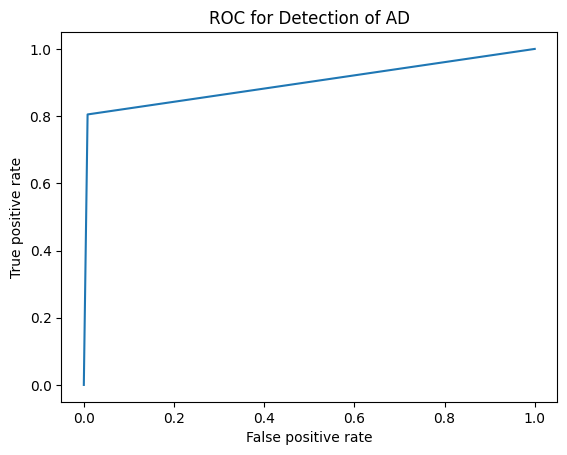

In [84]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

Ydes0=(Ydes==0)
Ydes0.astype('int')

Ypred0=(Ypred==0)
Ypred0.astype('int')

fpr_keras, tpr_keras, thresholds_keras = roc_curve(Ydes0, Ypred0)
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC for Detection of AD')
plt.savefig('ROC_AD.eps', format='eps')

In [85]:
auc_keras

0.8983333333333334

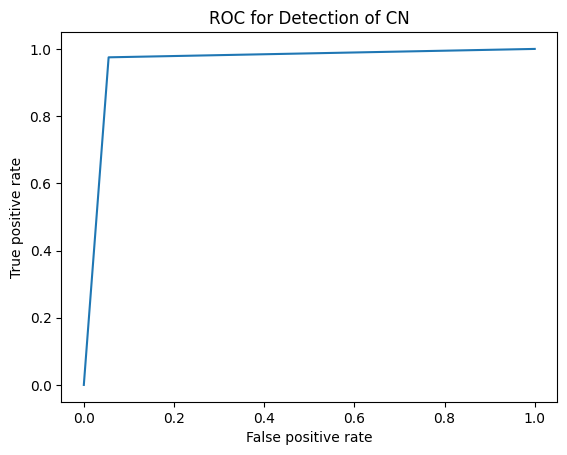

In [86]:
Ydes0=(Ydes==1)
Ydes0.astype('int')

Ypred0=(Ypred==1)
Ypred0.astype('int')

fpr_keras, tpr_keras, thresholds_keras = roc_curve(Ydes0, Ypred0)
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC for Detection of CN')
plt.savefig('ROC_CN.eps', format='eps')

In [87]:
auc_keras

0.96

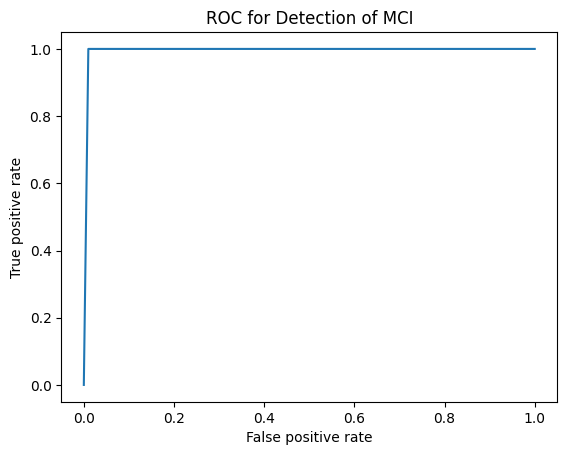

In [88]:
Ydes0=(Ydes==2)
Ydes0.astype('int')

Ypred0=(Ypred==2)
Ypred0.astype('int')

fpr_keras, tpr_keras, thresholds_keras = roc_curve(Ydes0, Ypred0)
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC for Detection of MCI')
plt.savefig('ROC_MCI.eps', format='eps')

In [89]:
auc_keras

0.995

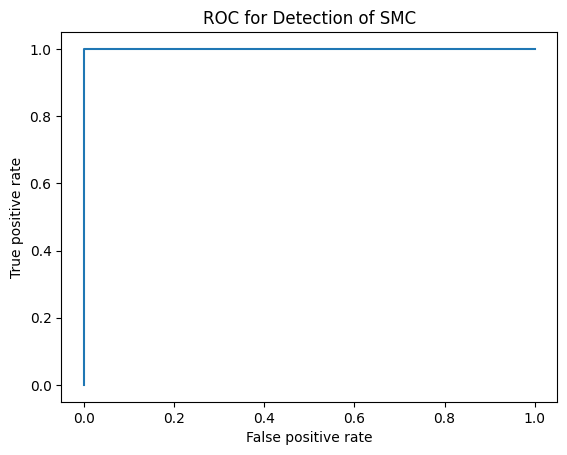

In [90]:
Ydes0=(Ydes==3)
Ydes0.astype('int')

Ypred0=(Ypred==3)
Ypred0.astype('int')

fpr_keras, tpr_keras, thresholds_keras = roc_curve(Ydes0, Ypred0)
auc_keras = auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title('ROC for Detection of SMC')
plt.savefig('ROC_SMC.eps', format='eps')

In [91]:
auc_keras

1.0

In [83]:
from sklearn.metrics import classification_report
print(classification_report(Ydes, Ypred))

              precision    recall  f1-score   support

         0.0       0.97      0.81      0.88       200
         1.0       0.86      0.97      0.91       200
         2.0       0.97      1.00      0.99       200
         3.0       1.00      1.00      1.00       200

    accuracy                           0.94       800
   macro avg       0.95      0.95      0.94       800
weighted avg       0.95      0.94      0.94       800



In [ ]:
j

In [ ]:
import scipy.io as scio
scio.savemat('/home/user/Chandrajit/Information_fusion/Y.mat',{'Ydes':Ydes, 'Ypred':Ypred})

In [ ]:
mat=scio.loadmat('/home/user/Chandrajit/Information_fusion/Y.mat')

In [ ]:
len(Ypred)

In [33]:
model.load_weights('/home/user/Chandrajit/Information_fusion/GAN_weights3/weight_23.h5')
op=model.layers[2]([inp0,inp1])
op1=model.layers[5]([op[3],op[4],op[2]])
m0=Model(inputs=[inp0,inp1], outputs=op1)

Y1=np.zeros(b1)
Y2=np.ones(b1)
Y3=np.ones(b1)*2

Y0=np.concatenate((Y1,Y2,Y3),axis=0)

Ypred=np.zeros(3*200)
Ydes=np.zeros(3*200)
count=0
for i in range(800,1000,b1):
            
            for j in range(0,b1):
                ad11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIAD[i+j]).resize((256,212))))
                ad21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETAD[i+j]).resize((256,212))))
                cn11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRICN[i+j]).resize((256,212))))
                cn21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETCN[i+j]).resize((256,212))))
                mc11[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(MRIMCI[i+j]).resize((256,212))))
                mc21[j,:,:]=np.asarray(ImageOps.grayscale(Image.open(PETMCI[i+j]).resize((256,212))))

            ad1=np.expand_dims(ad11,axis=-1)
            ad2=np.expand_dims(ad21,axis=-1)
            cn1=np.expand_dims(cn11,axis=-1)
            cn2=np.expand_dims(cn21,axis=-1)
            mc1=np.expand_dims(mc11,axis=-1)
            mc2=np.expand_dims(mc21,axis=-1)
            
            X1=np.concatenate((ad1,cn1,mc1),axis=0)
            X2=np.concatenate((ad2,cn2,mc2),axis=0)
            Y= m0.predict([X1,X2])
            Ydes[count:count+3*b1]=Y0
            Ypred[count:count+3*b1]=np.argmax(Y,axis=1)
            count=count+3*b1

sum(Ydes==Ypred)/len(Ydes)

10/10 [==============================] - 0s 13ms/step


0.5283333333333333

0.5316666666666666

In [24]:
m0.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 input_7 (InputLayer)        [(None, 212, 256, 1)]        0         []                            
                                                                                                  
 model (Functional)          [(None, 212, 256, 1),        17302     ['input_6[0][0]',             
                              (None, 212, 256, 1),                   'input_7[0][0]']             
                              (None, 26, 32, 16),                                                 
                              (None, 106, 128, 16),                                         